# Проект: Анализ данных об аниме
Работу выполнили студенты БММ225:
Худайбердиева Самина Шухратовна,
Медведская Мария Олеговна,
Нестерова Елизавета Кирилловна

## Данные
Для работы взяты данные из датасета "anime-dataset-2023.csv". Источник данных - https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset

Тема: Анализ датасета аниме 2023 года для ознакомления с современными трендами в японской анимации и вкусами зрителей.

## Описание признаков в данных

- anime_id - уникальный идентификатор аниме.
- Name - название аниме на английском языке.
- English name - альтернативное название аниме на английском языке.
- Other name - другие названия аниме, включая оригинальное название на японском.
- Score - средний рейтинг аниме.
- Genres - жанры аниме.
- Synopsis - краткое описание сюжета аниме.
- Type - тип аниме (TV, Movie и т.д.).
- Episodes - количество эпизодов.
- Aired - даты выхода аниме.
- Premiered - сезон и год премьеры.
- Producers - продюсеры аниме.
- Licensors - лицензиаты аниме.
- Studios - студии, которые создавали аниме.
- Source - оригинальный источник (манга, лайт-новелла и т.д.).
- Duration - продолжительность одного эпизода.
- Rating - возрастной рейтинг аниме.
- Rank - ранг аниме.
- Popularity - популярность аниме.
- Favorites - количество пользователей, добавивших аниме в избранное.
- Scored By - количество пользователей, оценивших аниме.
- Members - количество участников, добавивших аниме в свои списки.
- Image URL - URL изображения обложки аниме.

### **Разведочный анализ данных, EDA**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('anime-dataset-2023.csv', on_bad_lines="skip", engine='python')
df.info()
# Изначально в нашем датасете переменные anime_id, Popularity, Favorites и Members
# имеют целые значения (int64), остальные же используют текстовые или смешанные
# числовые и нечисловые значения (object). Нет пропущенных значений.
df.shape
# В изначальном датасете 24905 строк и 24 столбца

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

(24905, 24)

#### **Удаление выбросов**
Производится заранее, так как в процессе меняются типы данных.

In [30]:
# Список числовых столбцов для проверки выбросов
numeric_columns = ['Score', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Episodes']

# Преобразование столбцов в числовой формат float64, пропуская "UNKNOWN"
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Функция для определения количества выбросов методом 1.5*IQR
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return len(data[(data[column] < lower) | (data[column] > upper)])

# Проверка выбросов в каждом количественном столбце и их количество
# Записываем в словарь outliers_count, где ключом является название колонки,
# а значением - число выбросов в данной колонке
outliers_count = {column: detect_outliers_iqr(df, column) for column in numeric_columns}
print("Количественный признак и число выбросов по методу 1.5*IQR:")
print(outliers_count)

# Удаление выбросов из каждого столбца методом 1.5*IQR
for column in numeric_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df = df[(df[column] >= lower) & (df[column] <= upper)]

Количественный признак и число выбросов по методу 1.5*IQR:
{'Score': 68, 'Rank': 0, 'Popularity': 0, 'Favorites': 4489, 'Scored By': 2591, 'Members': 4297, 'Episodes': 2856}


#### **Число строк и столбцов**

In [31]:
df.shape # с помощью атрибута .shape узнали, сколько в датасете строк (7305) и столбцов (24) после удаления выбросов

(7305, 24)

#### **Типы данных**

In [32]:
df.dtypes # определили тип данных с помощью объекта dtypes
# в нашем датасете переменные anime_id, Popularity, Favorites и Members имеют целые значения (int64),
# переменные Score, Episodes, Rank и Scored By имеют целые значения (float64),
# остальные же используют текстовые или смешанные числовые и нечисловые значения (object)

anime_id          int64
Name             object
English name     object
Other name       object
Score           float64
Genres           object
Synopsis         object
Type             object
Episodes        float64
Aired            object
Premiered        object
Status           object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Rank            float64
Popularity        int64
Favorites         int64
Scored By       float64
Members           int64
Image URL        object
dtype: object

Непрерывный тип данных: Score
- относятся к количественному типу, где данные выражаются числами, их также можно сравнивать между собой
- могут принимать абсолютно любое значение из какого-то интервала
- для таких переменных можно рассчитать среднее арифметическое, и медиану, и моду, которую лучше искать для сгруппированных значений

Дискретный тип данных: Favorites, Popularity, anime_id, Members, Scored By, Episodes, Rank
- относятся к количественному типу, где данные выражаются числами, их также можно сравнивать между собой
- измеряются определенным, счетным набором данных, то есть количество возможных значений может быть ограничено
- для таких переменных можно рассчитать моду, предпочтительней именно для представления переменных

Порядковый тип данных: Rating
- относятся к категориальным (качественным) данным  
- такие данные можно упорядочить
- для таких переменных можно рассчитать медиану и моду

Номинальный тип данных: Aired, Premiered, Duration, Name, English name, Other name, Genres, Synopsis, Type, Studios, Source, Image URL, Licensors, Status, Producers
- относятся к категориальным (качественным) данным
- номинальные значения мы можем закодировать числами
- для таких переменных мода является единственной мерой центральной тенденции, которую можно вычислить

#### **Пропуски**

In [33]:
df.isna().sum() # напротив всех переменных указан 0, что значит - в данном датасете отсутствуют пропущенные значения
df

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
13,23,Ring ni Kakero 1,UNKNOWN,リングにかけろ１,6.39,"Action, Sports","In order to fulfill their dead father's wish, ...",TV,12.0,"Oct 6, 2004 to Dec 15, 2004",...,Toei Animation,Manga,25 min per ep,PG - Children,6943.0,8288,6,1378.0,4581,https://cdn.myanimelist.net/images/anime/1146/...
36,55,Arc the Lad,UNKNOWN,アークザラッド,6.51,"Action, Adventure, Fantasy, Horror, Sci-Fi","The story follows Elk, a bounty hunter in some...",TV,26.0,"Apr 5, 1999 to Oct 11, 1999",...,Bee Train,Game,22 min per ep,R - 17+ (violence & profanity),6294.0,5012,14,5911.0,16013,https://cdn.myanimelist.net/images/anime/3/490...
37,56,Avenger,UNKNOWN,アヴェンジャー,5.86,"Adventure, Fantasy, Sci-Fi",Mars has been colonized and is a world where c...,TV,13.0,"Oct 2, 2003 to Dec 25, 2003",...,Bee Train,Original,24 min per ep,R - 17+ (violence & profanity),9454.0,4856,20,6788.0,17396,https://cdn.myanimelist.net/images/anime/13/19...
50,69,Cluster Edge,UNKNOWN,CLUSTER EDGE（クラスターエッジ）,6.31,"Action, Fantasy, Sci-Fi",Cluster Edge Academy isn't just any school; it...,TV,25.0,"Oct 5, 2005 to Mar 29, 2006",...,Sunrise,Original,24 min per ep,PG-13 - Teens 13 or older,7357.0,5917,13,2996.0,10561,https://cdn.myanimelist.net/images/anime/1980/...
62,83,Kidou Senshi Gundam: Dai 08 MS Shoutai - Mille...,Mobile Suit Gundam: The 08th MS Team - Miller'...,機動戦士ガンダム 第08MS小隊 ミラーズ・リポート,6.76,"Drama, Romance, Sci-Fi","Shortly after being rescued off the Himalayas,...",Movie,1.0,"Aug 1, 1998",...,Sunrise,Original,52 min,PG-13 - Teens 13 or older,5014.0,5384,3,6621.0,13284,https://cdn.myanimelist.net/images/anime/1132/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24557,55315,Gensou Mangekyou: The Memories of Phantasm,Touhou Fantasy Kaleidoscope: The Memories of P...,幻想万華鏡 ~The Memories Of Phantasm~,7.78,Fantasy,"Marisa, an ordinary magician, suspects a youka...",OVA,18.0,"Aug 12, 2011 to May 7, 2023",...,UNKNOWN,Game,16 min per ep,PG-13 - Teens 13 or older,963.0,9993,68,662.0,2492,https://cdn.myanimelist.net/images/anime/1729/...
24579,55339,Mashle: Mash Burnedead to Fushigi na Tegami,Mashle: Magic and Muscles - Mash Burnedead and...,マッシュル-MASHLE- マッシュ・バーンデッドと不思議な手紙,5.84,"Action, Comedy, Fantasy",Recap of the first six episodes of Mashle.,Special,1.0,"May 20, 2023",...,A-1 Pictures,Manga,23 min,PG-13 - Teens 13 or older,9552.0,8772,10,1971.0,3828,https://cdn.myanimelist.net/images/anime/1097/...
24590,55355,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Ho...,Lee's Detective Agency: A Day in Lungmen - Hom...,《鲤氏侦探事务所》迷你剧先行短片 - Home Service,5.99,"Action, Comedy, Mystery","Infiltrating, disguising, and raiding. Tonight...",ONA,1.0,"Oct 24, 2021",...,"HMCH, Gravity Well",Game,3 min,PG-13 - Teens 13 or older,8891.0,14796,1,129.0,518,https://cdn.myanimelist.net/images/anime/1865/...
24729,55517,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN,アイドルマスター シンデレラガールズ U149,6.07,UNKNOWN,Recap of the first seven episodes of The IDOLM...,Special,1.0,"May 25, 2023",...,CygamesPictures,Web manga,23 min,PG-13 - Teens 13 or older,8521.0,15097,1,114.0,482,https://cdn.myanimelist.net/images/anime/1597/...


#### **Описательные статистики**

In [34]:
for column in df.columns:
    print(f"Описательные статистики для переменной '{column}':")
    print(df[column].describe())
    print()

Описательные статистики для переменной 'anime_id':
count     7305.000000
mean     21612.962628
std      16596.238183
min         23.000000
25%       5256.000000
50%      20175.000000
75%      36240.000000
max      55647.000000
Name: anime_id, dtype: float64

Описательные статистики для переменной 'Name':
count                 7305
unique                7305
top       Ring ni Kakero 1
freq                     1
Name: Name, dtype: object

Описательные статистики для переменной 'English name':
count        7305
unique       3064
top       UNKNOWN
freq         4197
Name: English name, dtype: object

Описательные статистики для переменной 'Other name':
count        7305
unique       7092
top       UNKNOWN
freq           25
Name: Other name, dtype: object

Описательные статистики для переменной 'Score':
count    7305.000000
mean        6.039207
std         0.762985
min         3.750000
25%         5.520000
50%         6.060000
75%         6.560000
max         8.620000
Name: Score, dtype: flo

In [35]:
# Выбор одного числового и одного категориального признака
# Расчет описательных статистик для числового признака
print("Описательные статистики для числового признака 'Popularity':")
print(df['Popularity'].describe())

# Интерпретация описательных статистик для числового признака
# (для выделения жирным шрифтом, из-за объемности вывода, были использованы
# значения ansi кодировки, найденые на просторах интернета '\033[1m', '\033[0;0m'
print('\nИнтерпретация для' + '\033[1m' + ' Popularity:' + '\033[0;0m')
print(f"Среднее значение: {df['Popularity'].mean()}") # Среднее значение признака
print(f"Стандартное отклонение: {df['Popularity'].std()}") # Отклонение от среднего значения
print(f"Дисперсия: {df['Popularity'].var()}")  # Дисперсия для выборки, ddof=1
print(f"Минимальное значение: {df['Popularity'].min()}") # Наименьшее значение
print(f"25-й перцентиль: {df['Popularity'].quantile(0.25)}") # Значение ниже, которого находится 25% данных
print(f"Медиана (50-й перцентиль): {df['Popularity'].median()}") # Срединное значение данных
print(f"75-й перцентиль: {df['Popularity'].quantile(0.75)}") # Значение ниже, которого находится 75% данных
print(f"Максимальное значение: {df['Popularity'].max()}") # Наибольшее значение
print(f"Размах: {df['Popularity'].max() - df['Popularity'].min()}") # Разница между самым большим и самым маленьким значением переменной
print(f"Интерквартильный размах: {df['Popularity'].quantile(0.75) - df['Popularity'].quantile(0.25)}") # IQR =Q3-Q1 интервал между первым и третьим квартилем

# Расчет описательных статистик для категориального признака
print("\nОписательные статистики для категориального признака Type:")
print(df['Type'].describe())

# Интерпретация описательных статистик для категориального признака
print('\nИнтерпретация для' + '\033[1m' + ' Type:' + '\033[0;0m')
print("Количество непустых значений по категориям:")
print(df['Type'].value_counts())
print(f"Количество непустых значений: {df['Type'].value_counts().sum()}") # Общее количество непустых значений
print(f"Уникальные значения: {df['Type'].unique()}") # Уникальные категории
print(f"Количество уникальных значений: {len(df['Type'].unique())}") # Количество различных, уникальных категорий
print(f"Самое частое значение (мода): {df['Type'].mode().values[0]}") # Самое частое значение
print(f"Частота самого частого значения: {df['Type'].value_counts().max()}") # Частота появления самого частого значения

Описательные статистики для числового признака 'Popularity':
count     7305.000000
mean     10297.042026
std       3499.753489
min       4591.000000
25%       7228.000000
50%      10249.000000
75%      13093.000000
max      19191.000000
Name: Popularity, dtype: float64

Интерпретация для Popularity:
Среднее значение: 10297.042026009582
Стандартное отклонение: 3499.7534886608064
Дисперсия: 12248274.481393486
Минимальное значение: 4591
25-й перцентиль: 7228.0
Медиана (50-й перцентиль): 10249.0
75-й перцентиль: 13093.0
Максимальное значение: 19191
Размах: 14600
Интерквартильный размах: 5865.0

Описательные статистики для категориального признака Type:
count      7305
unique        6
top       Movie
freq       1810
Name: Type, dtype: object

Интерпретация для Type:
Количество непустых значений по категориям:
Type
Movie      1810
Special    1558
ONA        1478
OVA        1373
TV         1085
UNKNOWN       1
Name: count, dtype: int64
Количество непустых значений: 7305
Уникальные значения: [

### **Визуализация**

C:\Users\marya\AppData\Local\Temp\ipykernel_22620\1882147966.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mode(), inplace=True)


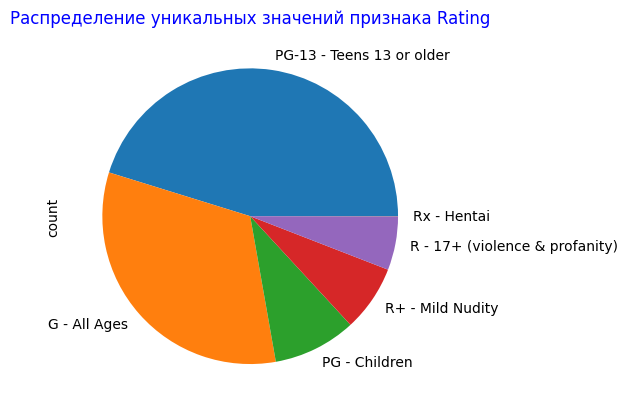

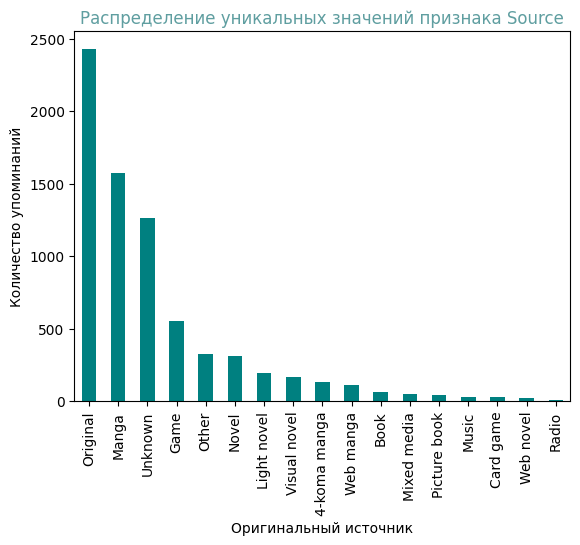

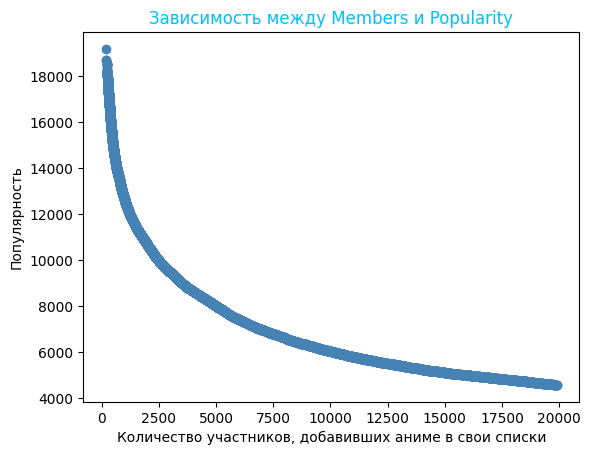

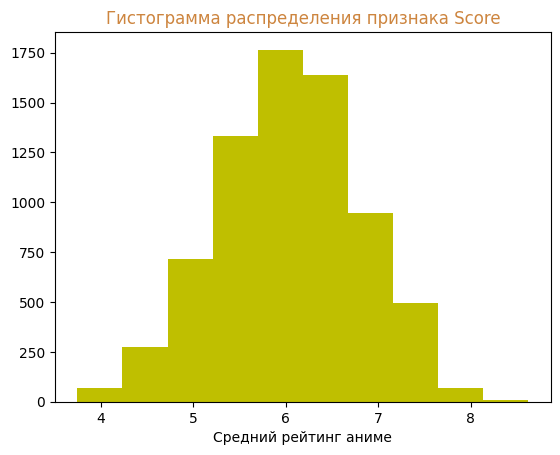

In [36]:
# Plot 1: Pie chart for Rating
# Заменяем UNKNOWN на моду, так как признак категориальный
# (здесь UNKNOWN всего один и закрывает одну из надписей в диаграмме)
df['Rating'] = df['Rating'].apply(lambda x: np.nan if x == "UNKNOWN" else x)
df['Rating'].fillna(df['Rating'].mode(), inplace=True)

df.Rating.value_counts().plot(kind='pie')
plt.title('Распределение уникальных значений признака Rating', fontsize=12, c='b')
plt.show()
# Вывод:
# Большинство аниме имеют возрастное ограничение старше 13 лет. Это опровергает
# миф о том, что аниме в основном ориентированы на детей (скорее на подростков и
# старше). Значительное количество аниме имеет рейтинг R-17+, что указывает на
# наличие контента для взрослой аудитории.
print()

# Plot 2: Bar chart for Source
df['Source'].value_counts().plot(kind='bar', color='teal')
plt.title('Распределение уникальных значений признака Source', fontsize=12, c='cadetblue')
plt.xlabel('Оригинальный источник')
plt.ylabel('Количество упоминаний')
plt.show()
# Вывод:
# Оригинальные сюжеты и манга являются основными источниками для аниме. Это
# подчеркивает важность манги в индустрии аниме. Радио является наименее
# популярным источником, что ожидаемо, учитывая его ныне непопулярный формат.
print()

# Plot 3: Scatter plot for Members and Popularity
plt.scatter(df['Members'], df['Popularity'], c='steelblue')
plt.title('Зависимость между Members и Popularity', fontsize=12, c='deepskyblue')
plt.xlabel('Количество участников, добавивших аниме в свои списки')
plt.ylabel('Популярность')
plt.show()
# Вывод:
# Наблюдается отрицательная линейная зависимость между популярностью и
# количеством участников, добавивших аниме в свои списки. Это может указывать на
# то, что старые и классические аниме имеют больше участников, но менее
# популярны в современных трендах. Нелинейная зависимость требует дополнительных
# анализов, но интересно, что точки четко выстроены вдоль дугообразной прямой.
print()

# Plot 4: Histogram for Score
plt.hist(df['Score'], color='y')
plt.title('Гистограмма распределения признака Score', fontsize=12, c='peru')
plt.xlabel('Средний рейтинг аниме')
plt.show()
# Вывод:
# Наиболее частый средний рейтинг для аниме - около 6, что указывает на средний
# уровень качества по мнению зрителей. Существует также значительное количество
# аниме с более высокими рейтингами, что свидетельствует о разнообразии в
# качестве и восприятии аниме. При этом средний рейтинг выше 8 крайне редок.

### **Корреляция**

In [37]:
df.select_dtypes(include = 'number').corr() # построили корреляционную матрицу только по количественным переменым

,anime_id,Score,Episodes,Rank,Popularity,Favorites,Scored By,Members
anime_id,1.000000,-0.118453,-0.031062,0.125160,0.267308,0.019448,-0.215199,-0.155820
Score,-0.118453,1.000000,0.191953,-0.977186,-0.582398,0.425972,0.481402,0.512889
Episodes,-0.031062,0.191953,1.000000,-0.181349,-0.161917,0.236644,0.057813,0.129845
Rank,0.125160,-0.977186,-0.181349,1.000000,0.609762,-0.454364,-0.517223,-0.543173
Popularity,0.267308,-0.582398,-0.161917,0.609762,1.000000,-0.488371,-0.797183,-0.860004
Favorites,0.019448,0.425972,0.236644,-0.454364,-0.488371,1.000000,0.497667,0.587220
Scored By,-0.215199,0.481402,0.057813,-0.517223,-0.797183,0.497667,1.000000,0.939686
Members,-0.155820,0.512889,0.129845,-0.543173,-0.860004,0.587220,0.939686,1.000000


Корреляция описывает, насколько сильно значения одной переменной изменяются в зависимости от изменений другой переменной.
Чем ближе коэффициент корреляции к 1-е, тем сильнее линейная взаимосвязь между переменными.

В нашем случае, была определена различная сила корреляционной связи:

Коэффициенты корреляции между переменными anime_id и Episodes (отрицательный); anime_id и Favorites (положительный); Episodes и Scored By (положительный) - обладают очень слабой линейной связью

Коэффициенты корреляции между переменными anime_id и Score (отрицательный); anime_id и Rank (положительный); anime_id и Popularity (положительный); anime_id и Scored By (отрицательный); anime_id и Members (отрицательный); Score и Episodes (положительный); Episodes и Rank (отрицательный); Episodes и Popularity (отрицательный); Episodes и Favorites (положительный); Episodes и Members (положительный) - обладают слабой линейной связью

Коэффициенты корреляции между переменными Score и Favorites (положительный); Score и Scored By (положительный); Rank и Favorites (отрицательный); Popularity и Favorites (отрицательный); Favorites и Scored By (положительный) - обладают умеренной линейной связью

Коэффициенты корреляции между переменными Score и Popularity (отрицательный); Score и Members (положительный); Rank и Popularity (положительный); Rank и Scored By (отрицательный); Rank и Members (отрицательный); Favorites и Members (положительный) - обладают заметной линейной связью

Коэффициенты корреляции между переменными Popularity и Scored By (отрицательный); Popularity и Members (отрицательный) - обладают сильной линейной связью

Коэффициенты корреляции между переменными Score и Rank (отрицательный); Scored By и Members (положительный) - обладают очень сильной линейной связью

### **Тестирование гипотез**

#### z-тест на математическое ожидание

In [38]:
# 1
from statsmodels.stats.weightstats import ztest as ztest
# Убираем значение 'UNKNOWN', заменяя его на моду, так как переменная дискретная
df['Episodes'] = df['Episodes'].apply(lambda x: df['Episodes'].mode() if x == "UNKNOWN" else x)

# Формулировка гипотезы:
# H0: Средняя продолжительность аниме равна 12 сериям (M = 12)
# H1: Средняя продолжительность аниме не равна 12 сериям (M != 12)
# Основания для гипотезы: Продолжительность сериала[аниме] обычно кратна сезону, состоящему из 12 серий. (Wikipedia)

# Проведение z-теста
result = ztest(df['Episodes'], value=12.0, alternative='two-sided')

# Уровень значимости
alpha = 0.05

# Результаты
z_stat, p_value = result[0], result[1]
print(f'z-статистика: {z_stat}, p-value: {p_value}')

# Проверка гипотезы
if p_value > alpha:
    print("Не отвергаем нулевую гипотезу (H0). Средняя продолжительность аниме равна 12 сериям.")
else:
    print("Отвергаем нулевую гипотезу (H0). Средняя продолжительность аниме не равна 12 сериям.")

# Ручной расчет z-статистики для проверки
mean_episodes = df['Episodes'].mean()
std_episodes = df['Episodes'].std(ddof=1)
n = df['Episodes'].shape[0]
z_stat_manual = (mean_episodes - 12) / (std_episodes / np.sqrt(n))
print(f'\nРучной расчет z-статистики: {z_stat_manual}')

z-статистика: -84.92484884360718, p-value: 0.0
Отвергаем нулевую гипотезу (H0). Средняя продолжительность аниме не равна 12 сериям.

Ручной расчет z-статистики: -84.92484884360718


#### t-тест на математическое ожидание

In [39]:
# 2
# Обработка неизвестных значений столбца 'Episodes' была в предыдущем подпункте

# Формулировка гипотезы:
# H0: Средняя продолжительность аниме равна 12 сериям (M = 12)
# H1: Средняя продолжительность аниме не равна 12 сериям (M != 12)

# Проведение t-теста
result = stats.ttest_1samp(a=df['Episodes'], popmean=12.0, alternative='two-sided')

# Уровень значимости
alpha = 0.05

# Результаты
t_stat, p_value = result.statistic, result.pvalue
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Проверка гипотезы
if p_value > alpha:
    print("Не отвергаем нулевую гипотезу (H0). Средняя продолжительность аниме равна 12 сериям.")
else:
    print("Отвергаем нулевую гипотезу (H0). Средняя продолжительность аниме не равна 12 сериям.")

t-statistic: -84.9248488436072, p-value: 0.0
Отвергаем нулевую гипотезу (H0). Средняя продолжительность аниме не равна 12 сериям.


#### тест на равенство математических ожиданий

In [40]:
# 3
# Обработка неизвестных значений в столбце 'Rank', замена на моду, так как переменная дискретная
df['Rank'] = df['Rank'].apply(lambda x: df['Rank'].mode() if x == "UNKNOWN" else x)

# Формулировка гипотезы:
# H0: Средние рейтинги аниме, которые закончились и которые продолжают сниматься, одинаковы.
# H1: Средние рейтинги аниме, которые закончились и которые продолжают сниматься, различаются.

# Разделение данных на две группы: Finished Airing и Currently Airing
fa = df[df['Status'] == "Finished Airing"]['Rank']
ca = df[df['Status'] == "Currently Airing"]['Rank']

# Проведение t-теста для независимых выборок
result = stats.ttest_ind(fa, ca)

# Уровень значимости
alpha = 0.05

# Результаты
t_stat, p_value = result.statistic, result.pvalue
print(f't-statistic: {t_stat}, p-value: {p_value}')

# Проверка гипотезы
if p_value > alpha:
    print("Не отвергаем нулевую гипотезу (H0). Средние рейтинги аниме, которые закончились и которые продолжают сниматься, одинаковы.")
else:
    print("Отвергаем нулевую гипотезу (H0). Средние рейтинги аниме, которые закончились и которые продолжают сниматься, различаются.")

t-statistic: 1.9611215615924154, p-value: 0.049902787937052405
Отвергаем нулевую гипотезу (H0). Средние рейтинги аниме, которые закончились и которые продолжают сниматься, различаются.


#### критерий независимости хи-квадрат




In [41]:
# 4
# Создаем таблицу сопряженности
contingency_table = pd.crosstab(df['Rating'], df['Status'])

# Проведение критерия хи-квадрат
result = stats.chi2_contingency(contingency_table)
print(result)

# Уровень значимости
alpha = 0.05

# Проверка гипотезы
if result.pvalue > alpha:
    print("Не отвергаем нулевую гипотезу (H0). Нет зависимости между рейтингом и статусом аниме.")
else:
    print("Отвергаем нулевую гипотезу (H0). Есть зависимость между рейтингом и статусом аниме.")

Chi2ContingencyResult(statistic=10.918174485937504, pvalue=0.05302669693929701, dof=5, expected_freq=array([[2.93072456e+00, 2.35206928e+03],
       [8.17616150e-01, 6.56182384e+02],
       [4.06941372e+00, 3.26593059e+03],
       [5.27654867e-01, 4.23472345e+02],
       [6.52101770e-01, 5.23347898e+02],
       [2.48893805e-03, 1.99751106e+00]]))
Не отвергаем нулевую гипотезу (H0). Нет зависимости между рейтингом и статусом аниме.


### **Задача регрессии**

In [42]:
from sklearn.model_selection import train_test_split

# Замена "UNKNOWN" в столбце Rank на его моду была в третьей гипотезе предыдущего пункта

# Определение признаков и целевой переменной
X = df[['Popularity', 'Favorites', 'Members']]  # Признаки
y = df['Rank']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки вручную
np.random.seed(42)  # Фиксируем seed для воспроизводимости
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape #(5113, 3)
X_test.shape #(2192, 3)

# Построение модели линейной регрессии
from sklearn. linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

# Оценка качества и вывод результатов оценки
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE train:", mean_squared_error(Y_train, pred_train))  # Среднеквадратичная ошибка
print("MSE test:", mean_squared_error(Y_test, pred_test))
print("MAE train:", mean_absolute_error(Y_train, pred_train)) # Cреднеабсолютная ошибка
print("MAE test:", mean_absolute_error(Y_test, pred_test))
print("R2 train:", r2_score(Y_train, pred_train))  # Коэффициент детерминации
print("R2 test:", r2_score(Y_test, pred_test))


MSE train: 5330913.619924649
MSE test: 5509420.323158168
MAE train: 1846.1934536965614
MAE test: 1884.071070233071
R2 train: 0.40686707121586774
R2 test: 0.40006360271963626


**Выводы**

Для оценки качества моделибыли взяты метрики: MSE (Среднеквадратичная ошибка), MAE (Среднеабсолютная ошибка), R2 (Коэффициент детерминации).

MSE train = 5330913.62, MSE test = 5509420.32. Эти значения MSE достаточно высоки, что указывает на значительные ошибки в предсказаниях как на обучающей, так и на тестовой выборках.

MAE train = 1846.19, MAE test = 1884.07. Значения MAE более информативны для интерпретации, так как они находятся в тех же единицах, что и целевая переменная (Rank). Средняя абсолютная ошибка на тестовой выборке составляет примерно 1884.07, что также указывает на значительные ошибки, но более интерпретируемые.

R2 train = 0.4069, R2 test = 0.4001. Значения R2 показывают, что модель объясняет примерно 41% дисперсии целевой переменной Rank на обучающей выборке и 40% на тестовой выборке. Это указывает на умеренное качество модели, но есть потенциал для улучшения.

Значения MSE и MAE на обучающей и тестовой выборках достаточно близки друг к другу, что указывает на отсутствие переобучения модели. Это хороший знак, так как модель демонстрирует стабильные результаты на обеих выборках. Высокие значения MSE и MAE указывают на значительные ошибки предсказаний. Это может быть следствием того, что признаки Popularity, Favorites и Members не полностью объясняют вариацию целевой переменной Rank. Значение R2 около 0.4001 - 0.4069 показывает, что модель объясняет менее половины дисперсии целевой переменной. Это означает, что большая часть вариации не объясняется моделью и что существуют другие факторы, которые влияют на Rank, но не включены в модель.
